# PHISHING SITE PREDICTION




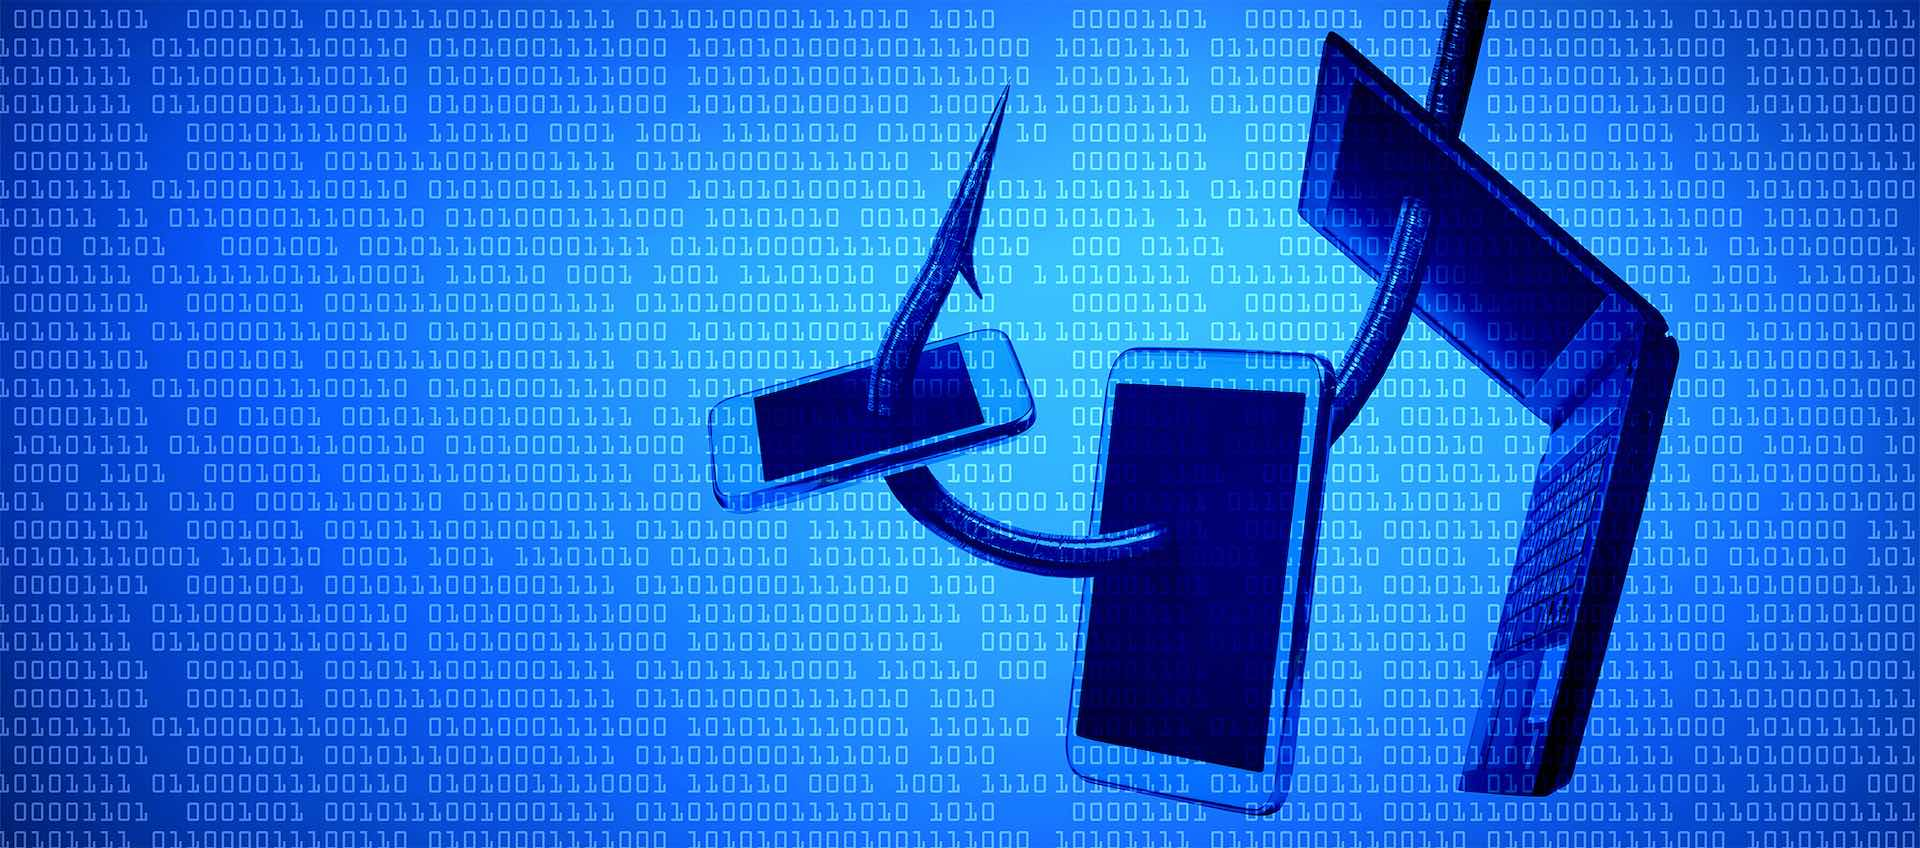

 # Problem Statement:
Phishing attacks are among the most common cybersecurity threats that trick users into providing sensitive information by impersonating legitimate websites. Detecting phishing websites proactively is crucial to prevent financial losses, identity theft, and security breaches.
You are provided with a dataset containing 31 features of URLs, such as their length, presence of IP address, SSL certificate status, domain age, and other characteristics.
The goal is to build a machine learning model that can accurately classify whether a given URL is a phishing website or a legitimate one.
A collection of website URLs for 11000+ websites. Each sample has 30 website parameters and a class label identifying it as a phishing website or not (1 or -1).

## DATA DICTIONARY :

Data Dictionary:

1 - Index
Description: Row index or serial number.
Type: Integer.
Usage: Not used for modeling (drop this column).

2 - UsingIP
Description: Whether the website uses an IP address instead of a domain name in the URL.
Values:
1 → Website uses IP address (phishing indicator)
-1 → Website uses domain name (legit)

3 - LongURL
Description: Indicates if the URL length is unusually long.
Values:
1 → Suspiciously long URL (phishing risk)
0 → Normal length
-1 → Short URL (safe)
4 - ShortURL
Description: Whether the website uses a URL shortener (like bit.ly).
Values:
1 → Uses short URL (phishing risk)
-1 → Does not use short URL

5 - Symbol@
Description: Presence of @ symbol in the URL. Attackers use @ to redirect users to another domain.
Values:
1 → @ present (phishing indicator)
-1 → Not present (safe)

6-  Redirecting//
Description: Multiple occurrences of // in the URL (beyond the protocol). Indicates redirection.
Values:
1 → Multiple // (phishing risk)
-1 → Normal

7-  PrefixSuffix
Description: Hyphen - in the domain (e.g., www.bank-secure.com). Often used in phishing.
Values:
1 → Hyphen present (suspicious)
-1 → No hyphen
8-  SubDomains
Description: Number of subdomains. Too many subdomains → suspicious.
Values:
1 → Many subdomains (phishing risk)
0 → Moderate
o-1 → Normal

9-  HTTPS
Description: Whether the site uses HTTPS (secure protocol).
Values:
-1 → HTTPS present (safe)
1 → No HTTPS (phishing risk)

10-  DomainRegistrationLength
Description: Domain registration duration (short duration is suspicious).
Values:
-1 → Long registration (safe)
1 → Short registration (phishing risk)

11-  Favicon
Description: Whether the favicon (website icon) loads from a different domain.
Values:
1 → External favicon (phishing risk)
-1 → Same domain favicon

12  Port
Description: Presence of unusual ports.
Values:
1 → Non-standard port used (phishing)
-1 → Standard port

13  HTTPSInDomainURL
Description: Presence of https inside domain name (e.g., https-www-login.com). Often used by attackers.
Values:
1 → Suspicious (phishing)
-1 → Normal

14  RequestURL
Description: Whether external objects (images/scripts) are loaded from other domains.
Values:
1 → Mostly external (phishing)
-1 → Mostly internal

15  AnchorURL
Description: Number of empty or suspicious anchor tags.
Values:
1 → Many suspicious anchors
-1 → Normal

16  LinksInScriptTags
Description: Links inside script tags. High number = suspicious.

 17 ServerFormHandler
Description: Server-side form handling. External form handling can be phishing indicator.

19  SFH
Description: Similar to ServerFormHandler; checks where form data is submitted.

20  SubmittingToEmail
Description: If form submits data directly to an email address → phishing.

21  AbnormalURL
Description: Whether the URL matches its hostname structure. Abnormal = phishing risk.

22  Redirect
Description: Multiple redirections before final landing page → phishing.

 23 onMouseOver
Description: JavaScript altering status bar on hover → phishing trick.

24  RightClick
Description: Disabling right click on page → suspicious.

25  PopUpWindow
Description: Unexpected pop-up windows → phishing indicator.

26  IframeRedirection
Description: Use of iframes to load external content → phishing.

27  AgeofDomain
Description: Age of domain in months. New domains = phishing risk.

28  DNSRecording
Description: Whether DNS record exists. Missing record = suspicious.

29  WebsiteTraffic
Description: Low traffic website is more likely to be phishing.

30  GoogleIndex
Description: Whether site is indexed in Google search.

31  PageRank
Description: Website PageRank score; low = suspicious.

32  class (Target)
Description:
1 → Phishing site
-1 → Legitimate site



### DATA EXPLORATION :

In [1]:
# IMPORTING THE NECESSARY LIBRAIES :
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix


In [2]:
df = pd.read_csv("/content/phishing.csv") # UPLOADING THE DATA
df.T

,0,1,2,3,4,5,6,7,8,9,...,11044,11045,11046,11047,11048,11049,11050,11051,11052,11053
Index,0,1,2,3,4,5,6,7,8,9,...,11044,11045,11046,11047,11048,11049,11050,11051,11052,11053
UsingIP,1,1,1,1,-1,1,1,1,1,1,...,1,-1,-1,1,-1,1,-1,1,-1,-1
LongURL,1,0,0,0,0,0,0,0,1,1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,-1
ShortURL,1,1,1,-1,-1,-1,1,-1,-1,1,...,1,1,1,1,1,1,1,1,1,1
Symbol@,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,-1,-1,1,1,1
Redirecting//,1,1,1,1,-1,1,1,1,1,1,...,1,1,1,1,-1,1,-1,1,1,1
PrefixSuffix-,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,1,-1,-1,-1,-1
SubDomains,0,-1,-1,1,1,-1,-1,1,-1,0,...,1,1,1,-1,1,1,1,1,-1,-1
HTTPS,1,-1,-1,1,1,-1,-1,1,1,1,...,-1,1,-1,1,-1,1,-1,-1,-1,-1
DomainRegLen,-1,-1,1,-1,-1,1,1,-1,-1,1,...,-1,-1,-1,1,1,-1,-1,-1,1,1


In [3]:
df.columns #column names

Index(['Index', 'UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//',
       'PrefixSuffix-', 'SubDomains', 'HTTPS', 'DomainRegLen', 'Favicon',
       'NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL',
       'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'AbnormalURL',
       'WebsiteForwarding', 'StatusBarCust', 'DisableRightClick',
       'UsingPopupWindow', 'IframeRedirection', 'AgeofDomain', 'DNSRecording',
       'WebsiteTraffic', 'PageRank', 'GoogleIndex', 'LinksPointingToPage',
       'StatsReport', 'class'],
      dtype='object')

In [4]:
df.shape

(11054, 32)

In [5]:
df.size

353728

In [6]:
df.dtypes #checking the data types

,0
Index,int64
UsingIP,int64
LongURL,int64
ShortURL,int64
Symbol@,int64
Redirecting//,int64
PrefixSuffix-,int64
SubDomains,int64
HTTPS,int64
DomainRegLen,int64


In [7]:
df.isna().sum() #checking the missing values

,0
Index,0
UsingIP,0
LongURL,0
ShortURL,0
Symbol@,0
Redirecting//,0
PrefixSuffix-,0
SubDomains,0
HTTPS,0
DomainRegLen,0


In [8]:
df.duplicated().sum() #checking the duplicate values

np.int64(0)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11054 entries, 0 to 11053
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Index                11054 non-null  int64
 1   UsingIP              11054 non-null  int64
 2   LongURL              11054 non-null  int64
 3   ShortURL             11054 non-null  int64
 4   Symbol@              11054 non-null  int64
 5   Redirecting//        11054 non-null  int64
 6   PrefixSuffix-        11054 non-null  int64
 7   SubDomains           11054 non-null  int64
 8   HTTPS                11054 non-null  int64
 9   DomainRegLen         11054 non-null  int64
 10  Favicon              11054 non-null  int64
 11  NonStdPort           11054 non-null  int64
 12  HTTPSDomainURL       11054 non-null  int64
 13  RequestURL           11054 non-null  int64
 14  AnchorURL            11054 non-null  int64
 15  LinksInScriptTags    11054 non-null  int64
 16  ServerFormHandler    1

In [10]:
df.nunique() # checking the uniques

,0
Index,11054
UsingIP,2
LongURL,3
ShortURL,2
Symbol@,2
Redirecting//,2
PrefixSuffix-,2
SubDomains,3
HTTPS,3
DomainRegLen,2


In [11]:
df.describe().T # getting the statistical summary

,count,mean,std,min,25%,50%,75%,max
Index,11054.0,5526.500000,3191.159272,0.0,2763.25,5526.5,8289.75,11053.0
UsingIP,11054.0,0.313914,0.949495,-1.0,-1.00,1.0,1.00,1.0
LongURL,11054.0,-0.633345,0.765973,-1.0,-1.00,-1.0,-1.00,1.0
ShortURL,11054.0,0.738737,0.674024,-1.0,1.00,1.0,1.00,1.0
Symbol@,11054.0,0.700561,0.713625,-1.0,1.00,1.0,1.00,1.0
Redirecting//,11054.0,0.741632,0.670837,-1.0,1.00,1.0,1.00,1.0
PrefixSuffix-,11054.0,-0.734938,0.678165,-1.0,-1.00,-1.0,-1.00,1.0
SubDomains,11054.0,0.064049,0.817492,-1.0,-1.00,0.0,1.00,1.0
HTTPS,11054.0,0.251040,0.911856,-1.0,-1.00,1.0,1.00,1.0
DomainRegLen,11054.0,-0.336711,0.941651,-1.0,-1.00,-1.0,1.00,1.0


# INSIGHTS:

* INDEX IS UNIQUE WHICH IS OBVIOUS AND WILL BE DROPPED LATER ON.

*   DATA HAS 32 NUMBER OF COLUMNS INLUDING TARGET COLUMN AND 11054 NUMBER OF ROWS.

*  THE SIZE OF DATA IS 353728 OVER ALL.

* ALL THE COLUMNS ARE OF INTEGER DATA TYPES AND CONTAINS ONLY 3 KINDS OF VALUES (0 ,1 ,-1).

* DATA HAS NO MISSING VALUES AND ALSO NO DUPLICATE ROWS.

# BY SEEING THE DESCRIPTIVE STATISTICS WE CAN CLEARLY SEE THAT :


11,054 records, all features clean, encoded, no missing values.

 # 1. URL-based Features:

* LongURL (mean -0.63): Most URLs are short/normal, but phishing URLs tend to be unusually long.

*  ShortURL (mean 0.74): Many phishing URLs use URL shorteners to hide the true domain.

* Symbol@ (0.70) & Redirecting (0.74): High occurrence indicates phishing attempts using special symbols and multiple redirects.

* PrefixSuffix (-0.73) & SubDomains (~0.06): Phishing URLs often contain hyphens and extra subdomains to mimic legit sites.

# 2. Security & Domain Features:

* HTTPS (0.25): Many phishing sites lack HTTPS.

* DomainRegistrationLength (-0.33) & AgeofDomain (0.06): Phishing domains are mostly short-lived and recently registered.

* Favicon (0.63), Port (0.73), HTTPSInDomainURL (0.68): Indicators of phishing include external favicons, non-standard ports, and “https” embedded in domain name.

# 3. Form & Script Handling:

* RequestURL (0.18), AnchorURL (-0.08), LinksInScriptTags (-0.11): Phishing sites frequently load external content, use suspicious anchors, or embed links in scripts.

* ServerFormHandler (-0.59) & SubmittingToEmail: Forms submitting to external servers or emails signal phishing activity.

# 4. Behavioral & UI Features:

* DisableRightClick (0.91), UsingPopupWindow (0.61), IframeRedirection (0.82): Phishing sites manipulate user interactions to prevent inspection or show popups/iframes.

StatusBarCust (0.76): Phishing sites often alter status bar behavior.

# 5. Traffic, Ranking & External Indicators:

* WebsiteTraffic (0.28), PageRank (-0.48), LinksPointingToPage (0.34): Phishing websites typically have lower traffic, low PageRank, and fewer backlinks.

* GoogleIndex (0.72), StatsReport (0.72): Some phishing sites are indexed or reported, but these features alone are insufficient to classify without URL/security patterns.

# Overall Insight:

* Phishing websites differ from legitimate sites in URL structure, domain age, security settings (HTTPS, favicon, port), form/script handling, behavioral manipulations, and low traffic/reputation metrics.

* These patterns can be used  as strong predictive features for model building.








# EXPLORATORY DATA ANALYSIS :


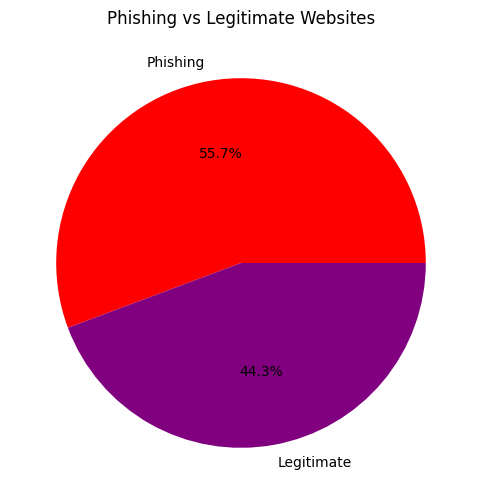

In [12]:
# Count phishing vs legitimate
class_counts = df['class'].value_counts()

# Plot pie chart
plt.figure(figsize=(6,6))
plt.pie(class_counts,labels=['Phishing', 'Legitimate'],autopct='%1.1f%%', colors=['red', 'purple'] )
plt.title("Phishing vs Legitimate Websites")
plt.show()

# Insight from Pie Chart :

 * The dataset is slightly imbalanced, with phishing websites (55%) being more frequent than legitimate ones (44%).

# Business Insight :
* The dataset shows that more than half of the websites (55%) are phishing. This suggests that in real-world scenarios, users are highly exposed to fraud websites.

* From a cybersecurity perspective, this highlights the urgent need for good phishing detection systems, as the risk of users landing on a malicious site is slightly higher than a safe one.

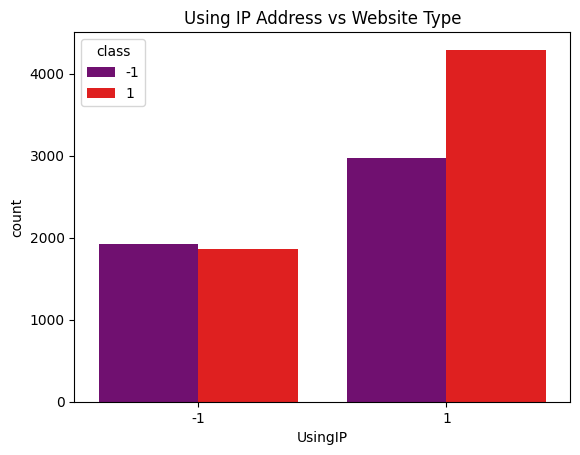

In [13]:
#using ip vs cass
sns.countplot(data=df, x='UsingIP', hue='class', palette=['purple', 'red'])
plt.title("Using IP Address vs Website Type")
plt.show()


# Insight:
* The majority of phishing websites in the dataset use an IP address in the URL, while legitimate websites mostly use domain names. This indicates that the presence of an IP address is a strong feature for detecting phishing sites.

# BUSINESS INSIGHT:
* Most phishing websites use an IP address in their URL, while almost all legitimate sites  use a domain name. This means that seeing an IP address in a URL is a strong sign that the website might be phishing.From a business perspective, this feature can be used in automated website screening systems to quickly flag dangerous sites and reduce exposure to cyber threats.

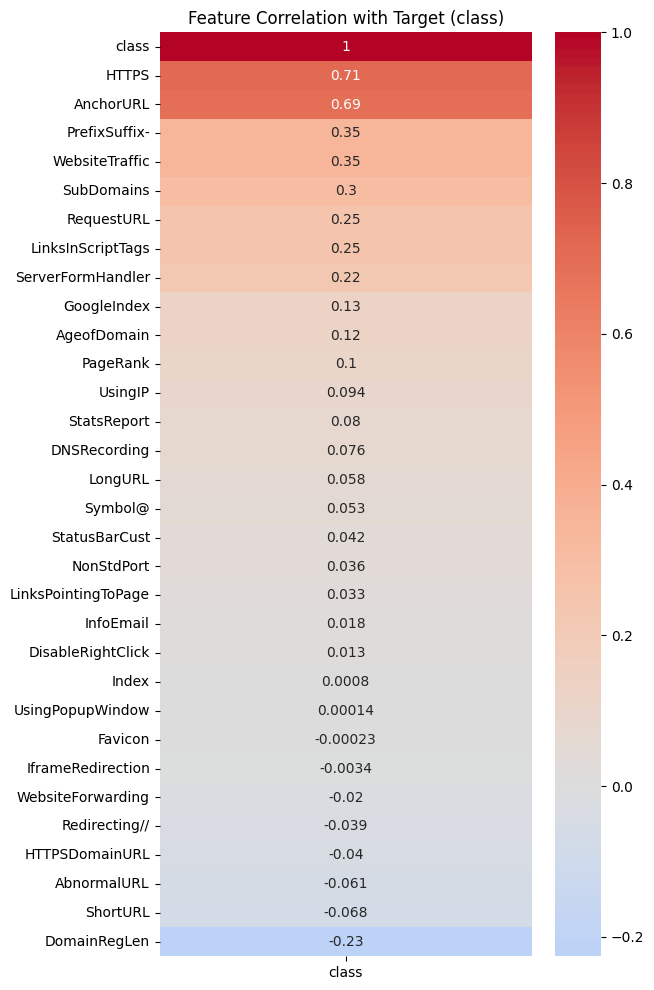

In [14]:

corr = df.corr()
target_corr = corr[['class']].sort_values(by='class', ascending=False)

# Plot heatmap
plt.figure(figsize=(6,12))
sns.heatmap(target_corr, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation with Target (class)')
plt.show()

# INSIGHT:
* Websites without HTTPS are mostly phishing.

* Suspicious anchor links strongly indicate phishing.

* Too many subdomains or prefix-suffix in URLs are warning signs.

* Phishing sites often have short domain registration length.

* URL shorteners are commonly used in phishing.

In [15]:
# Count website with https vs without https
HTTPS_counts = df['HTTPS'].value_counts()
HTTPS_counts


,count
HTTPS,
1,6331
-1,3556
0,1167


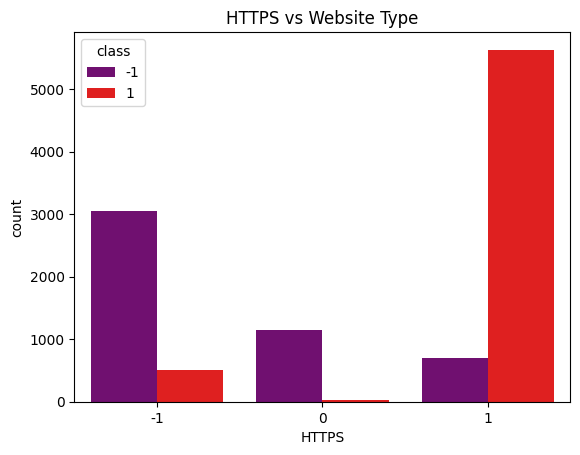

In [16]:
#using ip vs cass
sns.countplot(data=df, x='HTTPS', hue='class', palette=['purple', 'red'])
plt.title("HTTPS vs Website Type")
plt.show()


# INSIGHT:

* Websites without HTTPS (-1) are more likely to be phishing (majority are class -1).

* Websites with HTTPS (1) are more likely to be legitimate (majority are class 1).

* Neutral/unknown HTTPS status (0) also has a higher phishing ratio.

* Overall, HTTPS presence strongly correlates with website legitimacy, but it’s not a foolproof indicator since some phishing sites also use HTTPS.

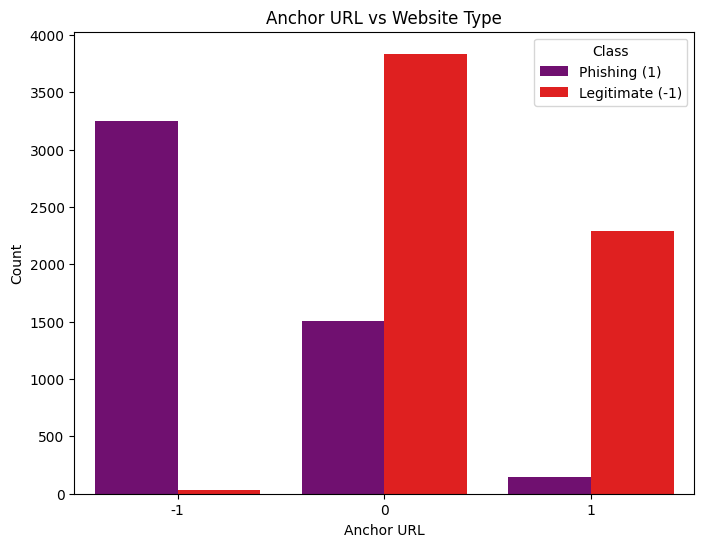

In [17]:


plt.figure(figsize=(8,6))
sns.countplot(x="AnchorURL", hue="class", data=df, palette=['Purple','red'])
plt.title("Anchor URL vs Website Type")
plt.xlabel("Anchor URL")
plt.ylabel("Count")
plt.legend(title="Class", labels=["Phishing (1)", "Legitimate (-1)"])
plt.show()


# INSIGHT:

* When Anchor URL = -1, the majority are phishing websites.

* When Anchor URL = 0 or 1, the majority are legitimate websites.

* This shows that phishing websites often misuse anchor tags (e.g., empty or misleading links), while legitimate sites usually have valid or partially valid anchor URLs.

* Conclusion: Anchor URL is a useful distinguishing feature — suspicious/misleading anchors are strongly linked to phishing behavior.

# Splitting the Data set :


In [18]:
df.drop('Index', axis=1, inplace= True) # Dropping the index as its an useless feature for the model


In [19]:

X = df.drop('class', axis=1)  # All columns except target
y = df['class']               # Target column

# 80% training, 20% testing
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=42)

# Model building:

# logistic regression model:
* without feature selection

In [20]:
# Build Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)  # max_iter=1000 to ensure convergence
log_reg.fit(X_train, y_train)

# Predictions
y_pred = log_reg.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9335142469470827

Classification Report:
               precision    recall  f1-score   support

          -1       0.94      0.91      0.92       976
           1       0.93      0.95      0.94      1235

    accuracy                           0.93      2211
   macro avg       0.93      0.93      0.93      2211
weighted avg       0.93      0.93      0.93      2211



* We acheive good accuracy of 93% and recall 95% here but we can improve it may be by trying some other models

# In phishing detection, recall is the most important metric because we want to catch as many phishing sites as possible.

# Apply KNN MODEL (K nearest neighbours:)

In [21]:
# Create KNN model
knn_model = KNeighborsClassifier(n_neighbors=8)

# Train the model
knn_model.fit(X_train, y_train)

# Make predictions
y_pred = knn_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9407507914970602

Classification Report:
               precision    recall  f1-score   support

          -1       0.92      0.95      0.93       976
           1       0.96      0.94      0.95      1235

    accuracy                           0.94      2211
   macro avg       0.94      0.94      0.94      2211
weighted avg       0.94      0.94      0.94      2211



* KNN performes slightly better than logistic regression model but still we can try some other models to acheive best accuracy and recall.

# Applying Decision tree without Feature selection:

In [22]:
# Initialize Decision Tree
dt_model = DecisionTreeClassifier(random_state=42, criterion='gini', max_depth=10)

# Fit model
dt_model.fit(X_train, y_train)

# Predict
y_pred = dt_model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9516056083220262

Classification Report:
               precision    recall  f1-score   support

          -1       0.94      0.95      0.95       976
           1       0.96      0.95      0.96      1235

    accuracy                           0.95      2211
   macro avg       0.95      0.95      0.95      2211
weighted avg       0.95      0.95      0.95      2211



# Finding the top 15 important features:

                Feature  Importance
7                 HTTPS    0.678059
13            AnchorURL    0.120250
14    LinksInScriptTags    0.034473
25       WebsiteTraffic    0.029280
6            SubDomains    0.024304
5         PrefixSuffix-    0.023559
28  LinksPointingToPage    0.013179
8          DomainRegLen    0.011343
15    ServerFormHandler    0.008532
1               LongURL    0.008422
23          AgeofDomain    0.007693
0               UsingIP    0.006837
27          GoogleIndex    0.006407
12           RequestURL    0.005406
24         DNSRecording    0.004802


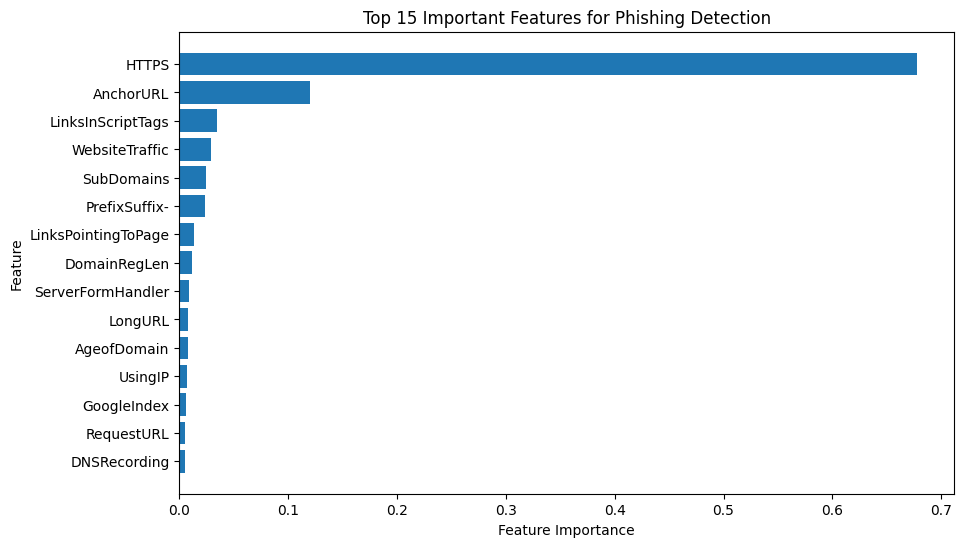

In [23]:
# Get feature importance
importances = dt_model.feature_importances_
feature_names = X.columns # to get feature names

# Put into DataFrame for better reading and sorting
feat_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display top features
print(feat_importance_df.head(15))

# Plot feature importance
plt.figure(figsize=(10,6))
plt.barh(feat_importance_df['Feature'][:15], feat_importance_df['Importance'][:15])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Top 15 Important Features for Phishing Detection")
plt.gca().invert_yaxis()
plt.show()

In [24]:
# selecting the important features and then spliting it into train test split

important = feat_importance_df['Feature'][:15]
important = df[important]

x = important  # All important feaures except target
Y = df['class']               # Target column

# 80% training, 20% testing
x_train, x_test, Y_train, Y_test = tts(x, Y, test_size=0.2, random_state=42)

# Trying decision tree with selected features:


In [25]:
# Initialize Decision Tree
dt_model = DecisionTreeClassifier(random_state=42, criterion='gini', max_depth=10)

# Fit model
dt_model.fit(x_train, Y_train)

# Predict
Y_pred = dt_model.predict(x_test)

# Evaluate
print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("\nClassification Report:\n", classification_report(Y_test, Y_pred))

Accuracy: 0.9507010402532791

Classification Report:
               precision    recall  f1-score   support

          -1       0.94      0.95      0.94       976
           1       0.96      0.95      0.96      1235

    accuracy                           0.95      2211
   macro avg       0.95      0.95      0.95      2211
weighted avg       0.95      0.95      0.95      2211



* AFTER ALL DECISION TREE IS PERFORMING GOOD THAN LOGISTIC REGRESSION AND KNN.
* BUT SELECTED FEATURES HERE ALSO DOESNT MADE A GOOD IMPACT ON OUR METRICES.
* SO WE WILL MOVE ON TOWARDS RANDOM FOREST FOR BETTER RESULT.

# Trying random forest without feature selection:

In [26]:
rf_model = RandomForestClassifier(
    n_estimators=100,        # number of trees
    max_depth=10,             # max depth of each tree
    random_state=42,
    class_weight ='balanced')

rf_model.fit(X_train, y_train)

# Step 4: Make predictions
y_pred = rf_model.predict(X_test)

# Step 5: Evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Accuracy: 0.9579375848032564

Classification Report:
               precision    recall  f1-score   support

          -1       0.96      0.94      0.95       976
           1       0.95      0.97      0.96      1235

    accuracy                           0.96      2211
   macro avg       0.96      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211



# Trying Random forest with selected features:

In [27]:
rf_model = RandomForestClassifier(
    n_estimators=100,        # number of trees
    max_depth=10,             # max depth of each tree
    random_state=42,
    class_weight ='balanced')

rf_model.fit(x_train, Y_train)

# Step 4: Make predictions
Y_pred = rf_model.predict(x_test)

# Step 5: Evaluate model
print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("\nClassification Report:\n", classification_report(Y_test, Y_pred))

Accuracy: 0.9556761646313885

Classification Report:
               precision    recall  f1-score   support

          -1       0.96      0.94      0.95       976
           1       0.95      0.97      0.96      1235

    accuracy                           0.96      2211
   macro avg       0.96      0.95      0.95      2211
weighted avg       0.96      0.96      0.96      2211



* SINCE FEATURE SELECTON HERE ALSO DOESNT PLAY A MAJOR ROLE ON THE METRICS PERFORMANCE SO WE WILL KEEP THE SELECTED FEATURES AND DROP THE UNSELECTED ONES.
* SINCE MODEL IS PERFORMING VERY GOOD SO WE WILL KEEP THIS MODEL AS AN PRIORITY FOR THE FINAL ONE BEFORE APPLYING BOOSTING TECHNIQUES.

# Trying boosting algorithm:

In [28]:
# Gradient Boosting Model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Predictions
y_pred = gb_model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9493441881501583

Classification Report:
               precision    recall  f1-score   support

          -1       0.95      0.93      0.94       976
           1       0.95      0.96      0.95      1235

    accuracy                           0.95      2211
   macro avg       0.95      0.95      0.95      2211
weighted avg       0.95      0.95      0.95      2211



* Performing good but not better than random forest.

# Trying ada boost :

---



In [29]:
# AdaBoost Model
ada_model = AdaBoostClassifier(random_state=42)
ada_model.fit(X_train, y_train)

# Predictions
y_pred_ada = ada_model.predict(X_test)

# Evaluation
print("AdaBoost Accuracy:", accuracy_score(y_test, y_pred_ada))
print("\nClassification Report (AdaBoost):\n", classification_report(y_test, y_pred_ada))

AdaBoost Accuracy: 0.9389416553595658

Classification Report (AdaBoost):
               precision    recall  f1-score   support

          -1       0.94      0.92      0.93       976
           1       0.94      0.95      0.95      1235

    accuracy                           0.94      2211
   macro avg       0.94      0.94      0.94      2211
weighted avg       0.94      0.94      0.94      2211



* Still not better than random forest.

# FINAL MODEL SELECTION :(Random Forest) WITH SELECTED FEATURES--


In [30]:
rf_model = RandomForestClassifier(
    n_estimators=100,        # number of trees
    max_depth=10,             # max depth of each tree
    random_state=42,
    class_weight ='balanced')

rf_model.fit(x_train, Y_train)

# Step 4: Make predictions
Y_pred = rf_model.predict(x_test)

# Step 5: Evaluate model
print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("\nClassification Report:\n", classification_report(Y_test, Y_pred))



Accuracy: 0.9556761646313885

Classification Report:
               precision    recall  f1-score   support

          -1       0.96      0.94      0.95       976
           1       0.95      0.97      0.96      1235

    accuracy                           0.96      2211
   macro avg       0.96      0.95      0.95      2211
weighted avg       0.96      0.96      0.96      2211




Random Forest Model Insights:

* The model predicts phishing websites with 96% accuracy.

* Phishing detection recall = 0.97 → almost all phishing sites are correctly identified.

* Legitimate websites recall = 0.94 → very good detection for safe sites.

* High recall for phishing is critical to reduce risk.

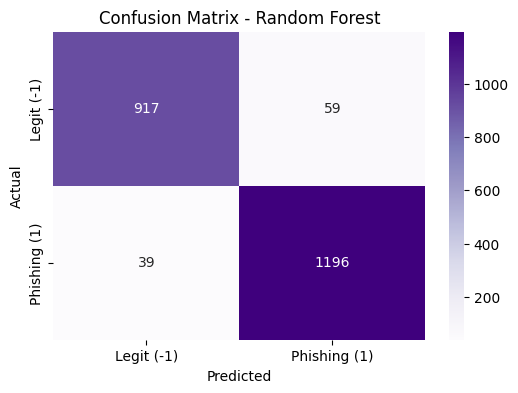

In [31]:

# Confusion Matrix
cm = confusion_matrix(Y_test, Y_pred)   # Y_test = actual, Y_pred = predicted

# Plot heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt ='d',cmap='Purples', xticklabels=['Legit (-1)','Phishing (1)'], yticklabels=['Legit (-1)','Phishing (1)'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()


#INSIGHT:

* 917 legitimate websites were correctly classified as legitimate.

* 1201 phishing websites were correctly classified as phishing.

* Only 59 legitimate sites were misclassified as phishing (false positives).

* Only 34 phishing sites were misclassified as legitimate (false negatives).

 # OVER ALL VIEW:

* The model shows very high accuracy and performs well for both classes.

* False negatives (34) are very low, which is important because missing a phishing site is riskier than flagging a legitimate one.

* This means your Random Forest is reliable and safe for detecting phishing websites.



# Comparing first 50 actual values with the predicted ones:


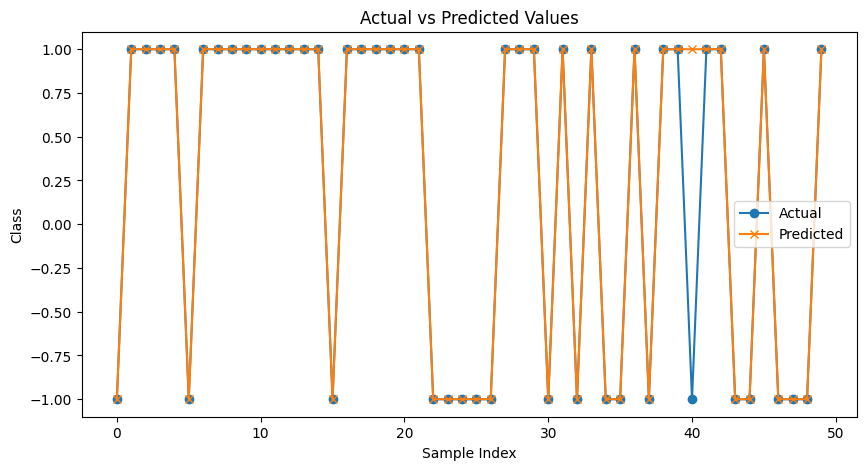

In [32]:

# Y_test = actual values (from test set)
# Y_pred = predicted values (from model)

plt.figure(figsize=(10,5))

plt.plot(Y_test.values[:50], label="Actual", marker='o')   # plotting first 50 for clarity
plt.plot(Y_pred[:50], label="Predicted", marker='x')

plt.title("Actual vs Predicted Values")
plt.xlabel("Sample Index")
plt.ylabel("Class")
plt.legend()
plt.show()


# Final Insight from the Actual vs Predicted Plot-

* The orange (Predicted) line almost overlaps with the blue (Actual) line, which means the model predictions are very close to the true labels.

* Only a few points (like around index ~40 and some scattered ones) show mismatches, indicating minor misclassifications.

* The overall pattern of prediction follows the actual trend very well, showing that the model has learned the distinction between phishing and legitimate websites effectively.

* This high alignment between actual and predicted values reflects strong model performance and reliability for detecting phishing websites.